In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
csv_dir = "C:/Users/Phili/Desktop/fond/data/SAND.csv"
data = pd.read_csv(csv_dir, header=0, index_col = 0, parse_dates = True, sep=";")

close = data["Closing price"]#[data.index > "2018-03-01"]




In [3]:
sw = 18
mw = 13
lw = 21
signals = pd.DataFrame(data=close.values,index = close.index, columns=["close"])
signals["signal"] = 0.0
signals["short"] = close.rolling(window=sw).mean()
signals["middle"] = close.rolling(window=mw).mean()
signals["long"] = close.rolling(window=lw).mean()
signals.tail()

,close,signal,short,middle,long
Date,,,,,
2005-01-10,53.924,0.0,54.786722,54.494923,55.003000
2005-01-07,53.533,0.0,54.656500,54.404769,54.858810
2005-01-05,52.654,0.0,54.482833,54.231923,54.700667
2005-01-04,53.435,0.0,54.358000,54.134231,54.561095
2005-01-03,53.338,0.0,54.287444,54.014000,54.440190


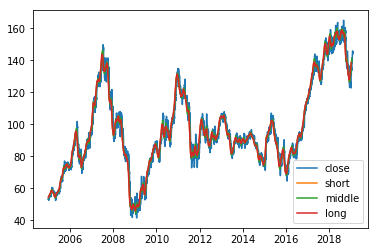

In [4]:
plt.plot(close, label="close")
plt.plot(signals["short"], label="short")
plt.plot(signals["middle"], label="middle")
plt.plot(signals["long"], label="long")
plt.legend()

In [5]:
signals["signal"][sw:] = np.where(np.logical_and(signals["short"][sw:] < signals["middle"][sw:] , signals["middle"][sw:] < signals["long"][sw:]), 1.0, 0.0)
signals["positions"] = signals["signal"].diff()


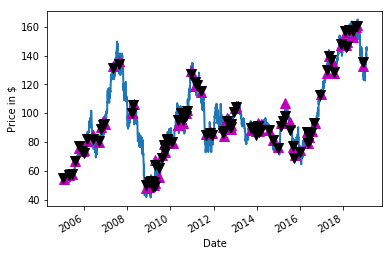

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
#signals[['short', 'middle', "long"]].plot(ax=ax1, lw=2.)
signals["close"].plot(ax=ax1, lw=2.)


# Plot the buy signals
ax1.plot(signals.loc[signals["positions"] == 1.0].index, 
         signals.close[signals["positions"] == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals["positions"] == -1.0].index, 
         signals.close[signals["positions"] == -1.0],
         'v', markersize=10, color='k')

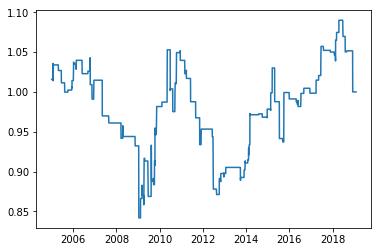

In [7]:
port = pd.DataFrame(index=close.index)
port["rets"] = close.pct_change().dropna()

port["total_rets"] = port["rets"]*signals["signal"]
plt.plot((1+port["total_rets"]).cumprod())